In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/strokeegdata/edffile/sub-04/eeg/sub-04_task-motor-imagery_eeg.edf
/kaggle/input/strokeegdata/edffile/sub-48/eeg/sub-48_task-motor-imagery_eeg.edf
/kaggle/input/strokeegdata/edffile/sub-47/eeg/sub-47_task-motor-imagery_eeg.edf
/kaggle/input/strokeegdata/edffile/sub-02/eeg/sub-02_task-motor-imagery_eeg.edf
/kaggle/input/strokeegdata/edffile/sub-44/eeg/sub-44_task-motor-imagery_eeg.edf
/kaggle/input/strokeegdata/edffile/sub-05/eeg/sub-05_task-motor-imagery_eeg.edf
/kaggle/input/strokeegdata/edffile/sub-33/eeg/sub-33_task-motor-imagery_eeg.edf
/kaggle/input/strokeegdata/edffile/sub-26/eeg/sub-26_task-motor-imagery_eeg.edf
/kaggle/input/strokeegdata/edffile/sub-20/eeg/sub-20_task-motor-imagery_eeg.edf
/kaggle/input/strokeegdata/edffile/sub-18/eeg/sub-18_task-motor-imagery_eeg.edf
/kaggle/input/strokeegdata/edffile/sub-09/eeg/sub-09_task-motor-imagery_eeg.edf
/kaggle/input/strokeegdata/edffile/sub-34/eeg/sub-34_task-motor-imagery_eeg.edf
/kaggle/input/strokeegdata/edffile/sub-1

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import mne
import numpy as np

BASE_PATH = '/kaggle/input/strokeegdata/edffile'
mne.set_log_file(fname=os.devnull, overwrite=True)

stroke_eeg = {}
total_signals_loaded = 0 
sfreq_printed = False

patient_folders = [d for d in os.listdir(BASE_PATH) if os.path.isdir(os.path.join(BASE_PATH, d))]
patient_folders.sort()

for i, patient_folder_name in enumerate(patient_folders[:50]):

    eeg_data_path = os.path.join(BASE_PATH, patient_folder_name, 'eeg')

    if not os.path.exists(eeg_data_path):
        continue

    # Find all .edf files inside the nested 'eeg' folder
    edf_files = [f for f in os.listdir(eeg_data_path) if f.endswith('.edf')]

    if not edf_files:
        continue

    patient_data_arrays = []

    for edf_file_name in edf_files:
        full_edf_path = os.path.join(eeg_data_path, edf_file_name)

        try:
            raw = mne.io.read_raw_edf(full_edf_path, preload=True)

            eeg_array = raw.get_data()

            patient_data_arrays.append(eeg_array)
            total_signals_loaded += 1
        
            if not sfreq_printed:
                print(f"Sampling Freq for stroke eeg: {raw.info['sfreq']} Hz")
                sfreq_printed = True 

        except Exception:
            continue

    if patient_data_arrays:
        stroke_eeg[patient_folder_name] = patient_data_arrays

print("\n" + "="*60)
print(f"| Stroke EEG Data Loading Summary |")
print("="*60)
print(f"| Total individual signals (EDF files) loaded: {total_signals_loaded}")
print(f"| Stroke Subjects (Folders) Loaded: {len(stroke_eeg)}")
print("="*60)

Sampling Freq for stroke eeg: 500.0 Hz

| Stroke EEG Data Loading Summary |
| Total individual signals (EDF files) loaded: 50
| Stroke Subjects (Folders) Loaded: 50


In [4]:
temp={}
for key,value in stroke_eeg.items():
    eeg_matrix=np.array(value[0])
    temp[key]=eeg_matrix
stroke_eeg=temp

for key in stroke_eeg.keys():
    print(stroke_eeg[key].shape)

(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)
(33, 160000)


In [5]:
print(stroke_eeg['sub-01'].shape)
stroke_eeg['sub-01']


(33, 160000)


array([[ 1.09646199e-04,  1.08225590e-04,  1.07014219e-04, ...,
         3.33184576e-06,  2.31319260e-06,  1.25048957e-06],
       [ 3.32744281e-05,  3.24673972e-05,  3.16822766e-05, ...,
        -2.66583468e-06, -1.99026583e-06, -1.25261768e-06],
       [ 2.61710864e-05,  2.52741216e-05,  2.43840832e-05, ...,
        -8.20974037e-07, -7.91536968e-07, -7.41320792e-07],
       ...,
       [ 4.14912743e-05,  4.23754000e-05,  4.32299138e-05, ...,
        -1.36978350e-06, -1.24287551e-06, -1.24710578e-06],
       [ 5.08534100e-05,  5.00452557e-05,  4.89232550e-05, ...,
        -4.54831545e-06, -4.47377694e-06, -4.70523862e-06],
       [ 1.00000000e-06,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [6]:
import pandas as pd
import io

metadata_table = """
Participant_ID	Gender	Age	Duration	ParalysisSide	Handedness	IsFirstTime	StrokeLocation	NIHSS	MBI	mRS
sub-01	male	45	1	right	right	yes	Left pons	11	50	4
sub-02	male	60	2	left	right	yes	Right pons	3	55	4
sub-03	male	60	2	left	right	no	"Left cerebellum, bilateral paraventricular, Right corona radiata"	3	90	1
sub-04	male	56	14	right	right	yes	"Left frontal parietal cortex, Left centrum semiovale"	6	90	3
sub-05	female	44	4	left	right	yes	Left pons	4	60	4
sub-06	male	66	6	left	left	no	Right pons	3	85	3
sub-07	male	62	5	right	right	no	Left pons	2	100	1
sub-08	male	64	5	left	right	yes	Right basal ganglia	3	85	2
sub-09	male	57	3	right	right	yes	Left paraventricular	6	55	1
sub-10	male	55	2	left	right	no	Right pons	3	55	0
sub-11	male	31	7	left	right	yes	Right paraventricular	5	55	4
sub-12	male	58	1	right	right	yes	Left medulla oblongata	1	100	1
sub-13	male	46	3	right	right	no	Left paraventricular	9	55	4
sub-14	female	67	2	right	right	yes	Left pons	2	75	1
sub-15	male	63	1	left	left	yes	"Right fronto-parietal temporo-occipital lobe, Right inner watershed"	7	55	1
sub-16	male	57	1	right	right	no	Left basal ganglia	4	90	2
sub-17	male	60	3	left	right	yes	"Right paraventricular, Right basal ganglia"	3	85	1
sub-18	female	60	1	left	right	yes	Right basal ganglia	10	45	4
sub-19	female	62	1	left	right	no	"Right paraventricular, Right basal ganglia"	8	40	4
sub-20	male	34	24	right	right	no	"Left paraventricular, Right temporal lobe"	2	95	1
sub-21	male	41	5	left	right	yes	Pons	2	90	1
sub-22	male	52	6	left	right	yes	"Right temporo-parietal occipital lobe and insula, Right basal ganglia, Right paraventricular"	11	45	4
sub-23	male	57	2	left	right	yes	"Right paraventricular, Right basal ganglia"	4	40	4
sub-24	female	55	3	right	right	yes	Left paraventricular	1	60	4
sub-25	male	47	10	left	right	yes	Right paraventricular	5	55	4
sub-26	male	61	1	left	right	yes	Right thalamus	4	70	4
sub-27	female	52	5	right	right	yes	"Left basal ganglia, Left paraventricular"	3	70	3
sub-28	female	42	2	right	right	yes	Left thalamus	1	85	1
sub-29	male	53	16	right	right	yes	Left thalamus	1	95	0
sub-30	male	68	4	left	right	yes	Right paraventricular	4	100	1
sub-31	female	59	5	right	right	no	"Left corona radiata, Left centrum semiovale"	3	80	3
sub-32	male	74	2	right	right	yes	Left pons	3	81	4
sub-33	male	63	7	right	right	yes	Pons	3	58	4
sub-34	female	69	1	left	right	no	Right frontal lobe	1	85	2
sub-35	male	69	11	left	right	no	"Right cerebellum,bilateral occipital lobes"	1	52	4
sub-36	male	69	30	left	right	yes	"Right paraventricular,right basal ganglia"	6	63	3
sub-37	male	49	7	left	right	yes	Right internal capsule	3	88	4
sub-38	male	53	2	right	right	yes	Right pons	3	64	3
sub-39	male	56	2	right	right	yes	"Left cerebellar hemisphere, Left medulla oblongata"	11	32	5
sub-40	female	56	6	left	right	no	Right pons	6	65	4
sub-41	male	77	2	right	right	no	Left pons	7	60	4
sub-42	male	54	2	right	right	no	Left pons	7	60	4
sub-43	male	32	3	left	right	yes	Right frontal lobe	2	65	4
sub-44	male	59	1	left	right	yes	"Right subfrontal cortex, Right basal ganglia, Right lateral ventricle, Right corona radiata"	1	80	1
sub-45	male	64	30	right	right	yes	Left pons	6	84	4
sub-46	male	66	10	right	right	yes	Left parietal lobe	1	85	1
sub-47	male	40	4	left	right	yes	Right medulla oblongata	7	55	4
sub-48	male	75	18	left	right	yes	"Right subcortical cerebral hemisphere, Right basal ganglia, Left subparietal cortex"	2	90	1
sub-49	male	52	3	left	right	yes	Right basal ganglia	1	85	1
sub-50	female	64	1	left	right	yes	Right pons	3	85	2
"""

subject_labels_df = pd.read_csv(io.StringIO(metadata_table), sep='\t')

subject_labels_df.rename(columns={'Participant_ID': 'subject_id'}, inplace=True)

loaded_subjects = list(stroke_eeg.keys())
final_labels_df= subject_labels_df[subject_labels_df['subject_id'].isin(loaded_subjects)]

print("✅ Subject Labels DataFrame Created (Showing first 5 rows):")
print("-" * 60)
print(final_labels_df.head())
print("-" * 60)
print(f"Total rows in final labels DataFrame: {len(final_labels_df)}")
print(f"Total subjects loaded in EEG data: {len(stroke_eeg)}")

✅ Subject Labels DataFrame Created (Showing first 5 rows):
------------------------------------------------------------
  subject_id  Gender  Age  Duration ParalysisSide Handedness IsFirstTime  \
0     sub-01    male   45         1         right      right         yes   
1     sub-02    male   60         2          left      right         yes   
2     sub-03    male   60         2          left      right          no   
3     sub-04    male   56        14         right      right         yes   
4     sub-05  female   44         4          left      right         yes   

                                      StrokeLocation  NIHSS  MBI  mRS  
0                                          Left pons     11   50    4  
1                                         Right pons      3   55    4  
2  Left cerebellum, bilateral paraventricular, Ri...      3   90    1  
3  Left frontal parietal cortex, Left centrum sem...      6   90    3  
4                                          Left pons      4   6

In [7]:
final_labels_df

,subject_id,Gender,Age,Duration,ParalysisSide,Handedness,IsFirstTime,StrokeLocation,NIHSS,MBI,mRS
0,sub-01,male,45,1,right,right,yes,Left pons,11,50,4
1,sub-02,male,60,2,left,right,yes,Right pons,3,55,4
2,sub-03,male,60,2,left,right,no,"Left cerebellum, bilateral paraventricular, Ri...",3,90,1
3,sub-04,male,56,14,right,right,yes,"Left frontal parietal cortex, Left centrum sem...",6,90,3
4,sub-05,female,44,4,left,right,yes,Left pons,4,60,4
5,sub-06,male,66,6,left,left,no,Right pons,3,85,3
6,sub-07,male,62,5,right,right,no,Left pons,2,100,1
7,sub-08,male,64,5,left,right,yes,Right basal ganglia,3,85,2
8,sub-09,male,57,3,right,right,yes,Left paraventricular,6,55,1
9,sub-10,male,55,2,left,right,no,Right pons,3,55,0


In [8]:
final_labels_df.isna().sum()

subject_id        0
Gender            0
Age               0
Duration          0
ParalysisSide     0
Handedness        0
IsFirstTime       0
StrokeLocation    0
NIHSS             0
MBI               0
mRS               0
dtype: int64

In [9]:
import mne
import numpy as np
import pandas as pd

SFREQ = 250.0  
L_FREQ = 0.5
H_FREQ = 45.0
NOTCH_FREQ = 50.0
TMAX = 5.0
STEP_S = TMAX * (1 - 0.1)

EXPLICIT_31_CHANNEL_NAMES = [
    'FP1', 'FP2', 'Fz', 'F3', 'F4', 'F7', 'F8', 'FCz', 'FC3', 'FC4', 
    'FT7', 'FT8', 'Cz', 'C3', 'C4', 'T3', 'T4', 'CP3', 'CP4', 'TP7', 
    'TP8', 'Pz', 'P3', 'P4', 'T5', 'T6', 'Oz', 'O1', 'O2', 
    'HEOL', 'VEOR'
]

FINAL_CHANNEL_NAMES_33 = EXPLICIT_31_CHANNEL_NAMES + ['STATUS1', 'STATUS2'] 

stroke_epochs = {}

print("--- Starting Final Preprocessing Pipeline (31 Named + 2 Placeholders) ---")

for patient_id, eeg_array in stroke_eeg.items():
    print(f"\nProcessing Subject: {patient_id}")
    
    n_channels_data = eeg_array.shape[0]

    try:
        # 1. Initialize RawArray with the 33 channel names
        info = mne.create_info(ch_names=FINAL_CHANNEL_NAMES_33, sfreq=SFREQ, ch_types='eeg')
        raw = mne.io.RawArray(eeg_array, info, verbose=False)
        
        # Set the non-EEG channel types manually
        raw.set_channel_types({'HEOL': 'eog', 'VEOR': 'eog','STATUS1':'stim','STATUS2':'misc'}) 

        montage = mne.channels.make_standard_montage('standard_1020')
        raw.set_montage(montage, on_missing='ignore', verbose=False)

        # 2. Prepare Channels and Resample
        raw_filt = raw.copy() 

        # Resampling Step (Ensuring SFREQ is 250 Hz)
        if raw_filt.info['sfreq'] >= SFREQ:
            print(f"  Resampling from {raw_filt.info['sfreq']} Hz to {SFREQ} Hz.")
            raw_filt.resample(SFREQ, verbose=False)
        
        # 3. Signal Processing
        
        # Notch filter
        raw_filt.notch_filter(freqs=NOTCH_FREQ, verbose=False)
        print(f"  Applied notch filter at {NOTCH_FREQ} Hz.")
        
        # Bandpass filter
        raw_filt.filter(l_freq=L_FREQ, h_freq=H_FREQ, verbose=False)
        print(f"  Applied bandpass filter: {L_FREQ}-{H_FREQ} Hz.")
        
        # Average reference (MNE uses only EEG channels for this by default)
        raw_filt.set_eeg_reference('average', projection=False, verbose=False)
        print("  Applied average reference (using only EEG channels) i.e only 29 channels discarding last two")
        
        # 4. Create Fixed-Length Epochs
        raw_epoched = raw_filt.copy().pick_types(eeg=True, exclude='bads') 
        
        events = mne.make_fixed_length_events(raw_epoched, duration=STEP_S, start=0.0)
        
        epochs = mne.Epochs(raw_epoched, events, tmin=0, tmax=TMAX,
                            baseline=None, preload=True, verbose=False)
        
        n_epochs = len(epochs)
        labels = np.array([1] * n_epochs) 
        epochs.metadata = pd.DataFrame({'label': labels})
        
        print(f"  Fixed-length epochs created: {n_epochs}") 
        
        stroke_epochs[patient_id] = epochs

    except Exception as e:
        print(f"❌ Critical Error processing {patient_id}: {e}")
        continue

print("\n====================================")
print("✅ Pipeline Complete.")
print(f"Total subjects successfully epoched: {len(stroke_epochs)}")

--- Starting Final Preprocessing Pipeline (31 Named + 2 Placeholders) ---

Processing Subject: sub-01
  Resampling from 250.0 Hz to 250.0 Hz.
  Applied notch filter at 50.0 Hz.
  Applied bandpass filter: 0.5-45.0 Hz.
  Applied average reference (using only EEG channels) i.e only 29 channels discarding last two
  Fixed-length epochs created: 142

Processing Subject: sub-02
  Resampling from 250.0 Hz to 250.0 Hz.
  Applied notch filter at 50.0 Hz.
  Applied bandpass filter: 0.5-45.0 Hz.
  Applied average reference (using only EEG channels) i.e only 29 channels discarding last two
  Fixed-length epochs created: 142

Processing Subject: sub-03
  Resampling from 250.0 Hz to 250.0 Hz.
  Applied notch filter at 50.0 Hz.
  Applied bandpass filter: 0.5-45.0 Hz.
  Applied average reference (using only EEG channels) i.e only 29 channels discarding last two
  Fixed-length epochs created: 142

Processing Subject: sub-04
  Resampling from 250.0 Hz to 250.0 Hz.
  Applied notch filter at 50.0 Hz.
  Ap

In [ ]:
import numpy as np
import pandas as pd
from scipy import signal
# Assuming SFREQ is still 250.0 from the preprocessing step
SFREQ = 250.0 

# Define the frequency bands (including Gamma)
BANDS = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30),
    'gamma': (30, 45)
}

def compute_band_power_standalone(data_2d, band, sampling_rate):
    """
    Calculates absolute and relative band power for 2D data (channels x time points).
    """
    l_freq, h_freq = band
    
    # Calculate nperseg: MNE epochs are 5s (1250 points). We use 512 as a stable window size.
    nperseg = 512
    
    freqs, psd = signal.welch(data_2d, fs=sampling_rate, nperseg=nperseg)
    
    # Isolate the target frequency band
    idx_band = np.logical_and(freqs >= l_freq, freqs <= h_freq)
    
    # Calculate Absolute Power (Area under the curve for the band)
    abs_power = np.trapz(psd[:, idx_band], freqs[idx_band], axis=1)
    
    # Calculate Total Power (Area under the curve for all available frequencies)
    total_power = np.trapz(psd, freqs, axis=1)
    
    # Calculate Relative Power (Handle division by zero)
    rel_power = np.divide(abs_power, total_power, 
                          out=np.zeros_like(abs_power), 
                          where=total_power != 0)
    
    return abs_power, rel_power

all_features = []
n_channels = stroke_epochs[list(stroke_epochs.keys())[0]].info['nchan']

print("Starting Feature Extraction (Abs/Rel Power)...")

for patient_id, epochs in stroke_epochs.items():
    
    # Extract the NumPy array (n_epochs, n_channels, n_times)
    epochs_data = epochs.get_data()
    
    for epoch_idx, epoch in enumerate(epochs_data):
        # 'epoch' shape is (n_channels, n_times)
        
        epoch_features = {'subject_id': patient_id, 'epoch_index': epoch_idx}
        
        for band_name, band_range in BANDS.items():
            
            # Compute power for the current epoch and band
            abs_power, rel_power = compute_band_power_standalone(epoch, band_range, SFREQ)
            
            # Store features for each channel
            for ch_idx in range(n_channels):
                ch_name = epochs.ch_names[ch_idx] # Use the actual channel name
                epoch_features[f'{band_name}_abs_{ch_name}'] = abs_power[ch_idx]
                epoch_features[f'{band_name}_rel_{ch_name}'] = rel_power[ch_idx] 
            
            # Store mean features across all channels
            epoch_features[f'{band_name}_abs_mean'] = abs_power.mean()
            epoch_features[f'{band_name}_rel_mean'] = rel_power.mean()
        
        all_features.append(epoch_features)

# Concatenate all subjects into a single master feature DataFrame
feature_matrix_df = pd.DataFrame(all_features)

print("✅ Feature Extraction Complete.")
print(f"Total rows (epochs) extracted: {len(feature_matrix_df)}")
print(f"Total features per epoch: {feature_matrix_df.shape[1] - 2}") 

Starting Feature Extraction (Abs/Rel Power)...
✅ Feature Extraction Complete.
Total rows (epochs) extracted: 7100
Total features per epoch: 300


In [11]:
feature_matrix_df

,subject_id,epoch_index,delta_abs_FP1,delta_rel_FP1,delta_abs_FP2,delta_rel_FP2,delta_abs_Fz,delta_rel_Fz,delta_abs_F3,delta_rel_F3,...,gamma_abs_T6,gamma_rel_T6,gamma_abs_Oz,gamma_rel_Oz,gamma_abs_O1,gamma_rel_O1,gamma_abs_O2,gamma_rel_O2,gamma_abs_mean,gamma_rel_mean
0,sub-01,0,4.435666e-10,0.423339,7.835339e-10,0.484459,2.055736e-11,0.354400,2.282745e-11,0.325856,...,4.566524e-20,6.917572e-10,2.345307e-20,1.469374e-10,1.521828e-19,4.832356e-10,1.587620e-19,1.125460e-09,5.949823e-20,7.862761e-10
1,sub-01,1,1.199301e-10,0.470547,4.163991e-11,0.463324,2.216839e-11,0.278470,2.662101e-11,0.292940,...,4.038379e-20,1.633144e-09,2.425713e-20,2.599328e-10,1.609582e-19,2.257289e-09,1.865861e-19,2.479628e-09,6.713371e-20,9.712918e-10
2,sub-01,2,1.191233e-10,0.543829,2.148040e-10,0.485777,8.486123e-12,0.403653,2.333224e-11,0.397021,...,5.128307e-20,1.682216e-09,1.991989e-20,7.175579e-10,1.751199e-19,2.803865e-09,2.227308e-19,2.921845e-09,6.409058e-20,1.958783e-09
3,sub-01,3,1.159827e-11,0.295560,1.437878e-11,0.157284,3.713323e-12,0.515875,3.992480e-12,0.290322,...,9.138585e-16,7.147419e-05,1.359581e-15,1.055947e-04,1.133716e-14,5.579674e-04,5.321976e-15,2.245130e-04,7.236107e-15,5.029889e-04
4,sub-01,4,2.056731e-11,0.253106,4.543241e-12,0.280371,6.851422e-12,0.505631,1.004955e-11,0.368205,...,3.113001e-20,2.636090e-09,2.173685e-20,1.451756e-09,1.557405e-19,7.623870e-09,1.715252e-19,7.858670e-09,5.471380e-20,3.981644e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7095,sub-50,137,4.598551e-11,0.157121,3.434268e-11,0.180256,2.445506e-11,0.361950,9.216029e-12,0.351328,...,6.218695e-19,1.569253e-08,1.122149e-18,2.189992e-08,3.538838e-19,7.562664e-09,3.483617e-19,6.863066e-09,4.617806e-19,1.785284e-08
7096,sub-50,138,5.185971e-11,0.227014,2.571494e-11,0.207071,2.282449e-11,0.252929,2.025699e-11,0.361283,...,5.007427e-15,1.988023e-04,1.712150e-13,1.932875e-03,6.544609e-14,2.259347e-03,6.953757e-14,2.895193e-03,8.401392e-14,1.181366e-03
7097,sub-50,139,2.279256e-11,0.175740,1.893526e-11,0.243327,2.345689e-11,0.274010,1.179050e-11,0.239604,...,8.039618e-19,1.564689e-08,9.408496e-19,1.546945e-08,3.680211e-19,1.575977e-08,4.622018e-19,2.205966e-08,4.847297e-19,1.166701e-08
7098,sub-50,140,2.281602e-11,0.188539,1.698664e-11,0.300181,1.316741e-11,0.320157,4.054300e-12,0.158374,...,6.164258e-19,2.205275e-08,7.132014e-19,1.549429e-08,3.109279e-19,1.206149e-08,3.200646e-19,1.528142e-08,4.617745e-19,1.597030e-08


In [12]:
feature_matrix_df[feature_matrix_df['subject_id']=='sub-01']

,subject_id,epoch_index,delta_abs_FP1,delta_rel_FP1,delta_abs_FP2,delta_rel_FP2,delta_abs_Fz,delta_rel_Fz,delta_abs_F3,delta_rel_F3,...,gamma_abs_T6,gamma_rel_T6,gamma_abs_Oz,gamma_rel_Oz,gamma_abs_O1,gamma_rel_O1,gamma_abs_O2,gamma_rel_O2,gamma_abs_mean,gamma_rel_mean
0,sub-01,0,4.435666e-10,0.423339,7.835339e-10,0.484459,2.055736e-11,0.354400,2.282745e-11,0.325856,...,4.566524e-20,6.917572e-10,2.345307e-20,1.469374e-10,1.521828e-19,4.832356e-10,1.587620e-19,1.125460e-09,5.949823e-20,7.862761e-10
1,sub-01,1,1.199301e-10,0.470547,4.163991e-11,0.463324,2.216839e-11,0.278470,2.662101e-11,0.292940,...,4.038379e-20,1.633144e-09,2.425713e-20,2.599328e-10,1.609582e-19,2.257289e-09,1.865861e-19,2.479628e-09,6.713371e-20,9.712918e-10
2,sub-01,2,1.191233e-10,0.543829,2.148040e-10,0.485777,8.486123e-12,0.403653,2.333224e-11,0.397021,...,5.128307e-20,1.682216e-09,1.991989e-20,7.175579e-10,1.751199e-19,2.803865e-09,2.227308e-19,2.921845e-09,6.409058e-20,1.958783e-09
3,sub-01,3,1.159827e-11,0.295560,1.437878e-11,0.157284,3.713323e-12,0.515875,3.992480e-12,0.290322,...,9.138585e-16,7.147419e-05,1.359581e-15,1.055947e-04,1.133716e-14,5.579674e-04,5.321976e-15,2.245130e-04,7.236107e-15,5.029889e-04
4,sub-01,4,2.056731e-11,0.253106,4.543241e-12,0.280371,6.851422e-12,0.505631,1.004955e-11,0.368205,...,3.113001e-20,2.636090e-09,2.173685e-20,1.451756e-09,1.557405e-19,7.623870e-09,1.715252e-19,7.858670e-09,5.471380e-20,3.981644e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,sub-01,137,4.032199e-10,0.688888,4.980983e-10,0.719341,1.085980e-11,0.549488,1.355187e-11,0.643588,...,3.279182e-20,1.014811e-09,2.316421e-20,7.421308e-10,1.292898e-19,2.222146e-09,1.968619e-19,3.971915e-09,5.086452e-20,2.344077e-09
138,sub-01,138,3.540244e-11,0.316537,4.448460e-11,0.399269,4.390522e-12,0.294729,7.543939e-12,0.304385,...,1.113990e-15,5.325430e-05,3.804173e-15,1.559617e-04,1.936234e-15,5.347768e-05,3.803068e-16,8.795468e-06,1.822274e-15,1.416647e-04
139,sub-01,139,9.140454e-12,0.310615,9.484814e-12,0.398684,6.474804e-12,0.589742,6.609810e-12,0.611442,...,3.153778e-20,2.129280e-09,2.277952e-20,1.196519e-09,1.569656e-19,4.191286e-09,2.346807e-19,6.780605e-09,5.952798e-20,4.577593e-09
140,sub-01,140,1.184544e-10,0.544273,1.215205e-10,0.509458,8.154429e-12,0.560127,9.324115e-12,0.555780,...,3.947047e-20,1.469326e-09,2.451601e-20,1.094290e-09,1.550829e-19,3.332283e-09,2.179935e-19,5.174441e-09,5.679416e-20,3.157780e-09


In [13]:
final_labels_df

,subject_id,Gender,Age,Duration,ParalysisSide,Handedness,IsFirstTime,StrokeLocation,NIHSS,MBI,mRS
0,sub-01,male,45,1,right,right,yes,Left pons,11,50,4
1,sub-02,male,60,2,left,right,yes,Right pons,3,55,4
2,sub-03,male,60,2,left,right,no,"Left cerebellum, bilateral paraventricular, Ri...",3,90,1
3,sub-04,male,56,14,right,right,yes,"Left frontal parietal cortex, Left centrum sem...",6,90,3
4,sub-05,female,44,4,left,right,yes,Left pons,4,60,4
5,sub-06,male,66,6,left,left,no,Right pons,3,85,3
6,sub-07,male,62,5,right,right,no,Left pons,2,100,1
7,sub-08,male,64,5,left,right,yes,Right basal ganglia,3,85,2
8,sub-09,male,57,3,right,right,yes,Left paraventricular,6,55,1
9,sub-10,male,55,2,left,right,no,Right pons,3,55,0


In [14]:
merged_df=feature_matrix_df
print(merged_df.shape)
merged_df


(7100, 302)


,subject_id,epoch_index,delta_abs_FP1,delta_rel_FP1,delta_abs_FP2,delta_rel_FP2,delta_abs_Fz,delta_rel_Fz,delta_abs_F3,delta_rel_F3,...,gamma_abs_T6,gamma_rel_T6,gamma_abs_Oz,gamma_rel_Oz,gamma_abs_O1,gamma_rel_O1,gamma_abs_O2,gamma_rel_O2,gamma_abs_mean,gamma_rel_mean
0,sub-01,0,4.435666e-10,0.423339,7.835339e-10,0.484459,2.055736e-11,0.354400,2.282745e-11,0.325856,...,4.566524e-20,6.917572e-10,2.345307e-20,1.469374e-10,1.521828e-19,4.832356e-10,1.587620e-19,1.125460e-09,5.949823e-20,7.862761e-10
1,sub-01,1,1.199301e-10,0.470547,4.163991e-11,0.463324,2.216839e-11,0.278470,2.662101e-11,0.292940,...,4.038379e-20,1.633144e-09,2.425713e-20,2.599328e-10,1.609582e-19,2.257289e-09,1.865861e-19,2.479628e-09,6.713371e-20,9.712918e-10
2,sub-01,2,1.191233e-10,0.543829,2.148040e-10,0.485777,8.486123e-12,0.403653,2.333224e-11,0.397021,...,5.128307e-20,1.682216e-09,1.991989e-20,7.175579e-10,1.751199e-19,2.803865e-09,2.227308e-19,2.921845e-09,6.409058e-20,1.958783e-09
3,sub-01,3,1.159827e-11,0.295560,1.437878e-11,0.157284,3.713323e-12,0.515875,3.992480e-12,0.290322,...,9.138585e-16,7.147419e-05,1.359581e-15,1.055947e-04,1.133716e-14,5.579674e-04,5.321976e-15,2.245130e-04,7.236107e-15,5.029889e-04
4,sub-01,4,2.056731e-11,0.253106,4.543241e-12,0.280371,6.851422e-12,0.505631,1.004955e-11,0.368205,...,3.113001e-20,2.636090e-09,2.173685e-20,1.451756e-09,1.557405e-19,7.623870e-09,1.715252e-19,7.858670e-09,5.471380e-20,3.981644e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7095,sub-50,137,4.598551e-11,0.157121,3.434268e-11,0.180256,2.445506e-11,0.361950,9.216029e-12,0.351328,...,6.218695e-19,1.569253e-08,1.122149e-18,2.189992e-08,3.538838e-19,7.562664e-09,3.483617e-19,6.863066e-09,4.617806e-19,1.785284e-08
7096,sub-50,138,5.185971e-11,0.227014,2.571494e-11,0.207071,2.282449e-11,0.252929,2.025699e-11,0.361283,...,5.007427e-15,1.988023e-04,1.712150e-13,1.932875e-03,6.544609e-14,2.259347e-03,6.953757e-14,2.895193e-03,8.401392e-14,1.181366e-03
7097,sub-50,139,2.279256e-11,0.175740,1.893526e-11,0.243327,2.345689e-11,0.274010,1.179050e-11,0.239604,...,8.039618e-19,1.564689e-08,9.408496e-19,1.546945e-08,3.680211e-19,1.575977e-08,4.622018e-19,2.205966e-08,4.847297e-19,1.166701e-08
7098,sub-50,140,2.281602e-11,0.188539,1.698664e-11,0.300181,1.316741e-11,0.320157,4.054300e-12,0.158374,...,6.164258e-19,2.205275e-08,7.132014e-19,1.549429e-08,3.109279e-19,1.206149e-08,3.200646e-19,1.528142e-08,4.617745e-19,1.597030e-08


In [15]:
print(final_labels_df['NIHSS'].unique(),final_labels_df['mRS'].unique())

[11  3  6  4  2  5  1  9  7 10  8] [4 1 3 2 0 5]


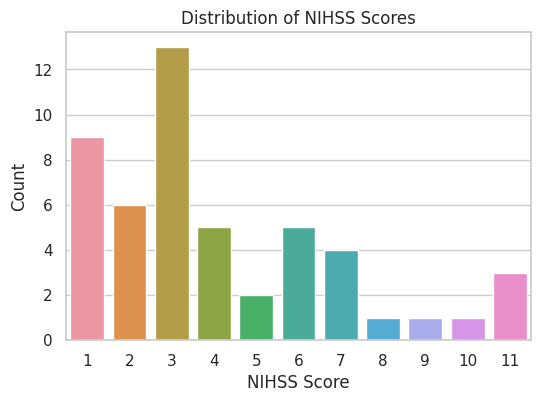

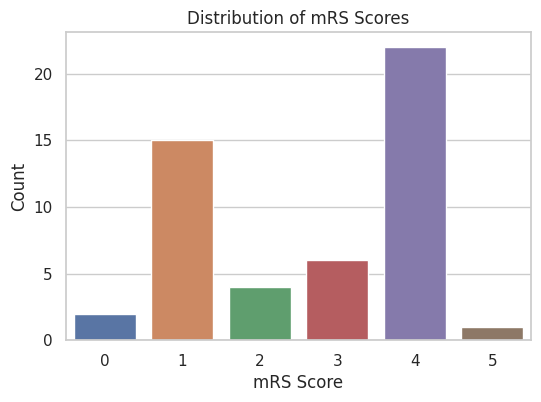

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")


plt.figure(figsize=(6,4))
nihss_counts = final_labels_df['NIHSS'].value_counts().sort_index()

sns.barplot(x=nihss_counts.index, y=nihss_counts.values)

plt.xlabel("NIHSS Score")
plt.ylabel("Count")
plt.title("Distribution of NIHSS Scores")
plt.show()


plt.figure(figsize=(6,4))
mrs_counts = final_labels_df['mRS'].value_counts().sort_index()

sns.barplot(x=mrs_counts.index, y=mrs_counts.values)

plt.xlabel("mRS Score")
plt.ylabel("Count")
plt.title("Distribution of mRS Scores")
plt.show()


### 1) Severity classification based on NIHSS scores

In [17]:
temp=final_labels_df
for th in range(1,12):
    temp['target']=temp['NIHSS']>th
    print(f"For the threshold of {th} the distribution among subjects is {temp['target'].value_counts()}")

For the threshold of 1 the distribution among subjects is target
True     41
False     9
Name: count, dtype: int64
For the threshold of 2 the distribution among subjects is target
True     35
False    15
Name: count, dtype: int64
For the threshold of 3 the distribution among subjects is target
False    28
True     22
Name: count, dtype: int64
For the threshold of 4 the distribution among subjects is target
False    33
True     17
Name: count, dtype: int64
For the threshold of 5 the distribution among subjects is target
False    35
True     15
Name: count, dtype: int64
For the threshold of 6 the distribution among subjects is target
False    40
True     10
Name: count, dtype: int64
For the threshold of 7 the distribution among subjects is target
False    44
True      6
Name: count, dtype: int64
For the threshold of 8 the distribution among subjects is target
False    45
True      5
Name: count, dtype: int64
For the threshold of 9 the distribution among subjects is target
False    46
Tru

In [18]:
temp=final_labels_df
for th in range(1,7):
    temp['target']=temp['mRS']>th
    print(f"For the threshold of {th} the distribution among subjects is {temp['target'].value_counts()}")

For the threshold of 1 the distribution among subjects is target
True     33
False    17
Name: count, dtype: int64
For the threshold of 2 the distribution among subjects is target
True     29
False    21
Name: count, dtype: int64
For the threshold of 3 the distribution among subjects is target
False    27
True     23
Name: count, dtype: int64
For the threshold of 4 the distribution among subjects is target
False    49
True      1
Name: count, dtype: int64
For the threshold of 5 the distribution among subjects is target
False    50
Name: count, dtype: int64
For the threshold of 6 the distribution among subjects is target
False    50
Name: count, dtype: int64


In [19]:
X_train=merged_df[:5254]
X_train

,subject_id,epoch_index,delta_abs_FP1,delta_rel_FP1,delta_abs_FP2,delta_rel_FP2,delta_abs_Fz,delta_rel_Fz,delta_abs_F3,delta_rel_F3,...,gamma_abs_T6,gamma_rel_T6,gamma_abs_Oz,gamma_rel_Oz,gamma_abs_O1,gamma_rel_O1,gamma_abs_O2,gamma_rel_O2,gamma_abs_mean,gamma_rel_mean
0,sub-01,0,4.435666e-10,0.423339,7.835339e-10,0.484459,2.055736e-11,0.354400,2.282745e-11,0.325856,...,4.566524e-20,6.917572e-10,2.345307e-20,1.469374e-10,1.521828e-19,4.832356e-10,1.587620e-19,1.125460e-09,5.949823e-20,7.862761e-10
1,sub-01,1,1.199301e-10,0.470547,4.163991e-11,0.463324,2.216839e-11,0.278470,2.662101e-11,0.292940,...,4.038379e-20,1.633144e-09,2.425713e-20,2.599328e-10,1.609582e-19,2.257289e-09,1.865861e-19,2.479628e-09,6.713371e-20,9.712918e-10
2,sub-01,2,1.191233e-10,0.543829,2.148040e-10,0.485777,8.486123e-12,0.403653,2.333224e-11,0.397021,...,5.128307e-20,1.682216e-09,1.991989e-20,7.175579e-10,1.751199e-19,2.803865e-09,2.227308e-19,2.921845e-09,6.409058e-20,1.958783e-09
3,sub-01,3,1.159827e-11,0.295560,1.437878e-11,0.157284,3.713323e-12,0.515875,3.992480e-12,0.290322,...,9.138585e-16,7.147419e-05,1.359581e-15,1.055947e-04,1.133716e-14,5.579674e-04,5.321976e-15,2.245130e-04,7.236107e-15,5.029889e-04
4,sub-01,4,2.056731e-11,0.253106,4.543241e-12,0.280371,6.851422e-12,0.505631,1.004955e-11,0.368205,...,3.113001e-20,2.636090e-09,2.173685e-20,1.451756e-09,1.557405e-19,7.623870e-09,1.715252e-19,7.858670e-09,5.471380e-20,3.981644e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5249,sub-37,137,8.188610e-12,0.323661,7.681934e-12,0.225769,1.413017e-11,0.570255,9.003484e-12,0.303035,...,4.261214e-19,1.765880e-08,3.440277e-19,2.043506e-08,5.897628e-19,1.775037e-08,5.311446e-19,1.495839e-08,6.432881e-19,2.769139e-08
5250,sub-37,138,2.868702e-11,0.209376,1.195381e-11,0.202529,8.356172e-12,0.370730,1.616296e-11,0.480184,...,3.588583e-15,1.621136e-04,1.457999e-13,5.631241e-03,7.238308e-15,3.501446e-04,9.440627e-14,2.987060e-03,1.400087e-13,1.678009e-03
5251,sub-37,139,4.868211e-11,0.395727,1.006005e-10,0.252584,6.688433e-12,0.302515,7.978997e-12,0.199183,...,4.431450e-19,1.384337e-08,4.524238e-19,6.818232e-09,4.757110e-19,1.290254e-08,4.421900e-19,1.429788e-08,6.409472e-19,1.299735e-08
5252,sub-37,140,7.999748e-10,0.151367,7.948526e-10,0.132203,3.215673e-11,0.156994,2.828896e-11,0.171696,...,3.257133e-19,9.264681e-10,4.345685e-19,1.115757e-09,4.221093e-19,9.015903e-10,4.792070e-19,1.159562e-09,6.644891e-19,3.648870e-09


In [20]:
X_test=merged_df[5254:]
X_test

,subject_id,epoch_index,delta_abs_FP1,delta_rel_FP1,delta_abs_FP2,delta_rel_FP2,delta_abs_Fz,delta_rel_Fz,delta_abs_F3,delta_rel_F3,...,gamma_abs_T6,gamma_rel_T6,gamma_abs_Oz,gamma_rel_Oz,gamma_abs_O1,gamma_rel_O1,gamma_abs_O2,gamma_rel_O2,gamma_abs_mean,gamma_rel_mean
5254,sub-38,0,2.752457e-11,0.528605,3.971335e-11,0.162198,1.825746e-12,0.445465,3.743463e-12,0.376218,...,2.251524e-20,2.359101e-09,3.285889e-19,4.204600e-08,7.778610e-20,2.862582e-10,3.835099e-20,1.514522e-09,2.532849e-19,1.723380e-08
5255,sub-38,1,8.419606e-12,0.205249,1.870819e-11,0.101483,1.572539e-12,0.395239,5.238258e-12,0.191581,...,2.684678e-20,2.206966e-09,4.390094e-19,3.664924e-08,6.484718e-20,2.174168e-09,3.361870e-20,1.587157e-09,2.628713e-19,1.930295e-08
5256,sub-38,2,8.681065e-11,0.512405,6.333223e-11,0.191902,6.058111e-12,0.431633,1.049644e-11,0.228384,...,2.491733e-20,7.600629e-10,4.110750e-19,1.959262e-08,5.477384e-20,1.834018e-09,2.913450e-20,1.058987e-09,2.478363e-19,6.837987e-09
5257,sub-38,3,5.407256e-11,0.276894,2.704059e-11,0.176875,2.814394e-12,0.257028,1.507043e-11,0.264713,...,2.769042e-14,1.359337e-03,7.633289e-15,1.666302e-04,5.021198e-15,8.440587e-05,1.986999e-14,3.653825e-04,1.527752e-14,5.818282e-04
5258,sub-38,4,2.053317e-11,0.291038,3.644441e-11,0.184185,3.348471e-12,0.374089,6.849579e-12,0.205940,...,2.463423e-20,1.330571e-09,3.512735e-19,2.147897e-08,7.429196e-20,1.496005e-09,3.068806e-20,7.404997e-10,2.602793e-19,8.920755e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7095,sub-50,137,4.598551e-11,0.157121,3.434268e-11,0.180256,2.445506e-11,0.361950,9.216029e-12,0.351328,...,6.218695e-19,1.569253e-08,1.122149e-18,2.189992e-08,3.538838e-19,7.562664e-09,3.483617e-19,6.863066e-09,4.617806e-19,1.785284e-08
7096,sub-50,138,5.185971e-11,0.227014,2.571494e-11,0.207071,2.282449e-11,0.252929,2.025699e-11,0.361283,...,5.007427e-15,1.988023e-04,1.712150e-13,1.932875e-03,6.544609e-14,2.259347e-03,6.953757e-14,2.895193e-03,8.401392e-14,1.181366e-03
7097,sub-50,139,2.279256e-11,0.175740,1.893526e-11,0.243327,2.345689e-11,0.274010,1.179050e-11,0.239604,...,8.039618e-19,1.564689e-08,9.408496e-19,1.546945e-08,3.680211e-19,1.575977e-08,4.622018e-19,2.205966e-08,4.847297e-19,1.166701e-08
7098,sub-50,140,2.281602e-11,0.188539,1.698664e-11,0.300181,1.316741e-11,0.320157,4.054300e-12,0.158374,...,6.164258e-19,2.205275e-08,7.132014e-19,1.549429e-08,3.109279e-19,1.206149e-08,3.200646e-19,1.528142e-08,4.617745e-19,1.597030e-08


In [21]:
y_train=(final_labels_df[:37]['NIHSS']>=5).astype(int)
y_train=pd.DataFrame(y_train)
y_train['subject_id']=final_labels_df['subject_id']
y_train.value_counts()
print(y_train.shape)

(37, 2)


In [22]:
y_train['NIHSS'].value_counts()

NIHSS
0    26
1    11
Name: count, dtype: int64

In [23]:
X_train.drop(['epoch_index'],axis=1,inplace=True)
X_test.drop(['epoch_index'],axis=1,inplace=True)

In [24]:
X_train

,subject_id,delta_abs_FP1,delta_rel_FP1,delta_abs_FP2,delta_rel_FP2,delta_abs_Fz,delta_rel_Fz,delta_abs_F3,delta_rel_F3,delta_abs_F4,...,gamma_abs_T6,gamma_rel_T6,gamma_abs_Oz,gamma_rel_Oz,gamma_abs_O1,gamma_rel_O1,gamma_abs_O2,gamma_rel_O2,gamma_abs_mean,gamma_rel_mean
0,sub-01,4.435666e-10,0.423339,7.835339e-10,0.484459,2.055736e-11,0.354400,2.282745e-11,0.325856,1.988194e-11,...,4.566524e-20,6.917572e-10,2.345307e-20,1.469374e-10,1.521828e-19,4.832356e-10,1.587620e-19,1.125460e-09,5.949823e-20,7.862761e-10
1,sub-01,1.199301e-10,0.470547,4.163991e-11,0.463324,2.216839e-11,0.278470,2.662101e-11,0.292940,9.062419e-12,...,4.038379e-20,1.633144e-09,2.425713e-20,2.599328e-10,1.609582e-19,2.257289e-09,1.865861e-19,2.479628e-09,6.713371e-20,9.712918e-10
2,sub-01,1.191233e-10,0.543829,2.148040e-10,0.485777,8.486123e-12,0.403653,2.333224e-11,0.397021,5.930443e-12,...,5.128307e-20,1.682216e-09,1.991989e-20,7.175579e-10,1.751199e-19,2.803865e-09,2.227308e-19,2.921845e-09,6.409058e-20,1.958783e-09
3,sub-01,1.159827e-11,0.295560,1.437878e-11,0.157284,3.713323e-12,0.515875,3.992480e-12,0.290322,1.624587e-12,...,9.138585e-16,7.147419e-05,1.359581e-15,1.055947e-04,1.133716e-14,5.579674e-04,5.321976e-15,2.245130e-04,7.236107e-15,5.029889e-04
4,sub-01,2.056731e-11,0.253106,4.543241e-12,0.280371,6.851422e-12,0.505631,1.004955e-11,0.368205,3.645783e-12,...,3.113001e-20,2.636090e-09,2.173685e-20,1.451756e-09,1.557405e-19,7.623870e-09,1.715252e-19,7.858670e-09,5.471380e-20,3.981644e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5249,sub-37,8.188610e-12,0.323661,7.681934e-12,0.225769,1.413017e-11,0.570255,9.003484e-12,0.303035,7.366398e-12,...,4.261214e-19,1.765880e-08,3.440277e-19,2.043506e-08,5.897628e-19,1.775037e-08,5.311446e-19,1.495839e-08,6.432881e-19,2.769139e-08
5250,sub-37,2.868702e-11,0.209376,1.195381e-11,0.202529,8.356172e-12,0.370730,1.616296e-11,0.480184,6.528486e-12,...,3.588583e-15,1.621136e-04,1.457999e-13,5.631241e-03,7.238308e-15,3.501446e-04,9.440627e-14,2.987060e-03,1.400087e-13,1.678009e-03
5251,sub-37,4.868211e-11,0.395727,1.006005e-10,0.252584,6.688433e-12,0.302515,7.978997e-12,0.199183,1.271811e-11,...,4.431450e-19,1.384337e-08,4.524238e-19,6.818232e-09,4.757110e-19,1.290254e-08,4.421900e-19,1.429788e-08,6.409472e-19,1.299735e-08
5252,sub-37,7.999748e-10,0.151367,7.948526e-10,0.132203,3.215673e-11,0.156994,2.828896e-11,0.171696,5.433156e-11,...,3.257133e-19,9.264681e-10,4.345685e-19,1.115757e-09,4.221093e-19,9.015903e-10,4.792070e-19,1.159562e-09,6.644891e-19,3.648870e-09


In [25]:
print(X_train.shape,y_train.shape)

(5254, 301) (37, 2)


In [26]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [27]:
y_train 

,NIHSS,subject_id
0,1,sub-01
1,0,sub-02
2,0,sub-03
3,1,sub-04
4,0,sub-05
5,0,sub-06
6,0,sub-07
7,0,sub-08
8,1,sub-09
9,0,sub-10


In [28]:
y_train['NIHSS'].value_counts()

NIHSS
0    26
1    11
Name: count, dtype: int64

In [29]:
print("Sample X_train subject IDs:", X_train.iloc[:5, 0].tolist())
print("Unique count X_train:", len(X_train.iloc[:,0].unique()))

print("\ny_train head:")
print(y_train.head())

print("\nUnique subject IDs in y_train:")
print(y_train['subject_id'].unique())

print("\nUnique subject IDs in X_train:")
print(X_train['subject_id'].unique())


Sample X_train subject IDs: ['sub-01', 'sub-01', 'sub-01', 'sub-01', 'sub-01']
Unique count X_train: 37

y_train head:
   NIHSS subject_id
0      1     sub-01
1      0     sub-02
2      0     sub-03
3      1     sub-04
4      0     sub-05

Unique subject IDs in y_train:
['sub-01' 'sub-02' 'sub-03' 'sub-04' 'sub-05' 'sub-06' 'sub-07' 'sub-08'
 'sub-09' 'sub-10' 'sub-11' 'sub-12' 'sub-13' 'sub-14' 'sub-15' 'sub-16'
 'sub-17' 'sub-18' 'sub-19' 'sub-20' 'sub-21' 'sub-22' 'sub-23' 'sub-24'
 'sub-25' 'sub-26' 'sub-27' 'sub-28' 'sub-29' 'sub-30' 'sub-31' 'sub-32'
 'sub-33' 'sub-34' 'sub-35' 'sub-36' 'sub-37']

Unique subject IDs in X_train:
['sub-01' 'sub-02' 'sub-03' 'sub-04' 'sub-05' 'sub-06' 'sub-07' 'sub-08'
 'sub-09' 'sub-10' 'sub-11' 'sub-12' 'sub-13' 'sub-14' 'sub-15' 'sub-16'
 'sub-17' 'sub-18' 'sub-19' 'sub-20' 'sub-21' 'sub-22' 'sub-23' 'sub-24'
 'sub-25' 'sub-26' 'sub-27' 'sub-28' 'sub-29' 'sub-30' 'sub-31' 'sub-32'
 'sub-33' 'sub-34' 'sub-35' 'sub-36' 'sub-37']


In [30]:
X_test

,subject_id,delta_abs_FP1,delta_rel_FP1,delta_abs_FP2,delta_rel_FP2,delta_abs_Fz,delta_rel_Fz,delta_abs_F3,delta_rel_F3,delta_abs_F4,...,gamma_abs_T6,gamma_rel_T6,gamma_abs_Oz,gamma_rel_Oz,gamma_abs_O1,gamma_rel_O1,gamma_abs_O2,gamma_rel_O2,gamma_abs_mean,gamma_rel_mean
5254,sub-38,2.752457e-11,0.528605,3.971335e-11,0.162198,1.825746e-12,0.445465,3.743463e-12,0.376218,2.737952e-11,...,2.251524e-20,2.359101e-09,3.285889e-19,4.204600e-08,7.778610e-20,2.862582e-10,3.835099e-20,1.514522e-09,2.532849e-19,1.723380e-08
5255,sub-38,8.419606e-12,0.205249,1.870819e-11,0.101483,1.572539e-12,0.395239,5.238258e-12,0.191581,2.203232e-11,...,2.684678e-20,2.206966e-09,4.390094e-19,3.664924e-08,6.484718e-20,2.174168e-09,3.361870e-20,1.587157e-09,2.628713e-19,1.930295e-08
5256,sub-38,8.681065e-11,0.512405,6.333223e-11,0.191902,6.058111e-12,0.431633,1.049644e-11,0.228384,2.609360e-11,...,2.491733e-20,7.600629e-10,4.110750e-19,1.959262e-08,5.477384e-20,1.834018e-09,2.913450e-20,1.058987e-09,2.478363e-19,6.837987e-09
5257,sub-38,5.407256e-11,0.276894,2.704059e-11,0.176875,2.814394e-12,0.257028,1.507043e-11,0.264713,2.681331e-11,...,2.769042e-14,1.359337e-03,7.633289e-15,1.666302e-04,5.021198e-15,8.440587e-05,1.986999e-14,3.653825e-04,1.527752e-14,5.818282e-04
5258,sub-38,2.053317e-11,0.291038,3.644441e-11,0.184185,3.348471e-12,0.374089,6.849579e-12,0.205940,3.781069e-11,...,2.463423e-20,1.330571e-09,3.512735e-19,2.147897e-08,7.429196e-20,1.496005e-09,3.068806e-20,7.404997e-10,2.602793e-19,8.920755e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7095,sub-50,4.598551e-11,0.157121,3.434268e-11,0.180256,2.445506e-11,0.361950,9.216029e-12,0.351328,6.338364e-12,...,6.218695e-19,1.569253e-08,1.122149e-18,2.189992e-08,3.538838e-19,7.562664e-09,3.483617e-19,6.863066e-09,4.617806e-19,1.785284e-08
7096,sub-50,5.185971e-11,0.227014,2.571494e-11,0.207071,2.282449e-11,0.252929,2.025699e-11,0.361283,1.324406e-11,...,5.007427e-15,1.988023e-04,1.712150e-13,1.932875e-03,6.544609e-14,2.259347e-03,6.953757e-14,2.895193e-03,8.401392e-14,1.181366e-03
7097,sub-50,2.279256e-11,0.175740,1.893526e-11,0.243327,2.345689e-11,0.274010,1.179050e-11,0.239604,5.669085e-12,...,8.039618e-19,1.564689e-08,9.408496e-19,1.546945e-08,3.680211e-19,1.575977e-08,4.622018e-19,2.205966e-08,4.847297e-19,1.166701e-08
7098,sub-50,2.281602e-11,0.188539,1.698664e-11,0.300181,1.316741e-11,0.320157,4.054300e-12,0.158374,5.054696e-12,...,6.164258e-19,2.205275e-08,7.132014e-19,1.549429e-08,3.109279e-19,1.206149e-08,3.200646e-19,1.528142e-08,4.617745e-19,1.597030e-08


In [31]:
y_test=(final_labels_df[37:]['NIHSS']>=5).astype(int)
y_test=pd.DataFrame(y_test)
y_test['subject_id']=final_labels_df['subject_id']
print(y_test.shape)
y_test

(13, 2)


,NIHSS,subject_id
37,0,sub-38
38,1,sub-39
39,1,sub-40
40,1,sub-41
41,1,sub-42
42,0,sub-43
43,0,sub-44
44,1,sub-45
45,0,sub-46
46,1,sub-47


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# X_train: DataFrame, first col = subject_id, next 300 cols = features
# y_train: DataFrame with 'subject_id' and 'NIHSS' (0/1)
train_subject_ids = X_train.iloc[:, 0].values
train_features = X_train.iloc[:, 1:].values

# Map subject IDs → binary NIHSS labels
label_map_train = dict(zip(y_train["subject_id"], y_train["NIHSS"].astype(int)))

unique_train_subjects = sorted(np.unique(train_subject_ids))

# Stack per subject: (40 subjects, 142 epochs, 300 features)
X_train_grouped = np.stack([train_features[train_subject_ids == sid] 
                            for sid in unique_train_subjects])

# Subject-level binary labels
y_train_subjects = np.array([label_map_train[sid] for sid in unique_train_subjects], dtype=int)

# Convert to tensors
X_train_seq = torch.tensor(X_train_grouped, dtype=torch.float32).to(device)
y_train_seq = torch.tensor(y_train_subjects, dtype=torch.long).to(device)

print("X_train_seq shape:", X_train_seq.shape)
print("y_train_subjects distribution:", np.unique(y_train_subjects, return_counts=True))

test_subject_ids = X_test.iloc[:, 0].values
test_features = X_test.iloc[:, 1:].values

label_map_test = dict(zip(y_test["subject_id"], y_test["NIHSS"].astype(int)))

unique_test_subjects = sorted(np.unique(test_subject_ids))

X_test_grouped = np.stack([test_features[test_subject_ids == sid] 
                           for sid in unique_test_subjects])

y_test_subjects = np.array([label_map_test[sid] for sid in unique_test_subjects], dtype=int)

X_test_seq = torch.tensor(X_test_grouped, dtype=torch.float32).to(device)
y_test_seq = torch.tensor(y_test_subjects, dtype=torch.long).to(device)

print("X_test_seq shape:", X_test_seq.shape)
print("y_test_subjects distribution:", np.unique(y_test_subjects, return_counts=True))

class_counts = np.bincount(y_train_subjects)  # e.g., [27, 13]
weights = torch.tensor(1.0 / class_counts, dtype=torch.float32).to(device)
criterion = nn.CrossEntropyLoss(weight=weights)

print("Class counts:", class_counts)
print("Class weights:", weights.cpu().numpy())

class SubjectBiLSTM(nn.Module):
    def __init__(self, input_dim=300, hidden_dim=128):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, 2)  # Binary classification

    def forward(self, x):
        _, (h, _) = self.lstm(x)
        # Concatenate last forward & backward hidden states
        out = torch.cat([h[-2], h[-1]], dim=1)
        return self.fc(out)

model = SubjectBiLSTM(input_dim=300, hidden_dim=128).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

def evaluate(X, y):
    model.eval()
    with torch.no_grad():
        logits = model(X)
        preds = torch.argmax(logits, dim=1)
        acc = accuracy_score(y.cpu(), preds.cpu())
        f1 = f1_score(y.cpu(), preds.cpu(), zero_division=0)
    return acc, f1, preds.cpu().numpy()

best_test_acc = -1
best_epoch = -1
best_metrics = {}
best_preds = None

epochs = 70
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    logits = model(X_train_seq)
    loss = criterion(logits, y_train_seq)
    loss.backward()
    optimizer.step()

    train_acc, train_f1, _ = evaluate(X_train_seq, y_train_seq)
    test_acc, test_f1, test_predictions = evaluate(X_test_seq, y_test_seq)

    print(f"Epoch {epoch+1}/{epochs} | Loss={loss.item():.4f} | "
          f"Train ACC={train_acc:.3f} F1={train_f1:.3f} | "
          f"Test ACC={test_acc:.3f} F1={test_f1:.3f}")

    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_epoch = epoch + 1
        best_metrics = {
            "train_acc": train_acc,
            "train_f1": train_f1,
            "test_acc": test_acc,
            "test_f1": test_f1
        }
        best_preds = test_predictions.copy()

print("\n✔ Training Completed!")

print("\n================ BEST EPOCH RESULTS ================")
print(f"Best Epoch: {best_epoch}")
print(f"Best Test Accuracy: {best_test_acc:.4f}")
print(f"Best Test F1-Score: {best_metrics['test_f1']:.4f}")
print(f"Train ACC at Best Epoch: {best_metrics['train_acc']:.4f}")
print(f"Train F1 at Best Epoch: {best_metrics['train_f1']:.4f}")
print("Best Predictions:", best_preds)
print("====================================================\n")

_, _, test_preds = evaluate(X_test_seq, y_test_seq)

print("\n===== FINAL TEST RESULTS =====")
print("True labels :", y_test_seq.cpu().numpy())
print("Predicted   :", test_preds)

print("\nClassification Report:")
print(classification_report(y_test_seq.cpu(), test_preds, digits=4))

print("Confusion Matrix:")
print(confusion_matrix(y_test_seq.cpu(), test_preds))


 


Using device: cuda
X_train_seq shape: torch.Size([37, 142, 300])
y_train_subjects distribution: (array([0, 1]), array([26, 11]))
X_test_seq shape: torch.Size([13, 142, 300])
y_test_subjects distribution: (array([0, 1]), array([7, 6]))
Class counts: [26 11]
Class weights: [0.03846154 0.09090909]
Epoch 1/70 | Loss=0.6929 | Train ACC=0.703 F1=0.000 | Test ACC=0.538 F1=0.000
Epoch 2/70 | Loss=0.6921 | Train ACC=0.703 F1=0.000 | Test ACC=0.538 F1=0.000
Epoch 3/70 | Loss=0.6914 | Train ACC=0.730 F1=0.167 | Test ACC=0.538 F1=0.000
Epoch 4/70 | Loss=0.6908 | Train ACC=0.730 F1=0.167 | Test ACC=0.538 F1=0.000
Epoch 5/70 | Loss=0.6901 | Train ACC=0.703 F1=0.267 | Test ACC=0.538 F1=0.250
Epoch 6/70 | Loss=0.6894 | Train ACC=0.730 F1=0.545 | Test ACC=0.462 F1=0.222
Epoch 7/70 | Loss=0.6887 | Train ACC=0.703 F1=0.522 | Test ACC=0.462 F1=0.222
Epoch 8/70 | Loss=0.6881 | Train ACC=0.757 F1=0.667 | Test ACC=0.538 F1=0.400
Epoch 9/70 | Loss=0.6874 | Train ACC=0.757 F1=0.667 | Test ACC=0.538 F1=0.571
Ep

In [ ]:

y_train2 = (final_labels_df[:37]['mRS'] >= 3).astype(int)
y_train2 = pd.DataFrame(y_train2, columns=['mRS'])  # ensure column name
y_train2['subject_id'] = final_labels_df[:37]['subject_id'].values

print("y_train2 shape:", y_train2.shape)
print("y_train2 distribution:\n", y_train2['mRS'].value_counts())

y_test2 = (final_labels_df[37:]['mRS'] >= 3).astype(int)
y_test2 = pd.DataFrame(y_test2, columns=['mRS'])
y_test2['subject_id'] = final_labels_df[37:]['subject_id'].values

print("y_test2 shape:", y_test2.shape)
print("y_test2 distribution:\n", y_test2['mRS'].value_counts())


y_train2 shape: (37, 2)
y_train2 distribution:
 mRS
1    21
0    16
Name: count, dtype: int64
y_test2 shape: (13, 2)
y_test2 distribution:
 mRS
1    8
0    5
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

train_subject_ids = X_train.iloc[:, 0].values
train_features = X_train.iloc[:, 1:].values

# Map subject IDs → binary mRS >=3 labels
label_map_train2 = dict(zip(y_train2["subject_id"], y_train2["mRS"].astype(int)))

unique_train_subjects = sorted(np.unique(train_subject_ids))

# Stack per subject: (40 subjects, 142 epochs, 300 features)
X_train_grouped = np.stack([train_features[train_subject_ids == sid] 
                            for sid in unique_train_subjects])

# Subject-level binary labels
y_train_subjects2 = np.array([label_map_train2[sid] for sid in unique_train_subjects], dtype=int)

# Convert to tensors
X_train_seq = torch.tensor(X_train_grouped, dtype=torch.float32).to(device)
y_train_seq = torch.tensor(y_train_subjects2, dtype=torch.long).to(device)

print("X_train_seq shape:", X_train_seq.shape)
print("y_train_subjects2 distribution:", np.unique(y_train_subjects2, return_counts=True))

test_subject_ids = X_test.iloc[:, 0].values
test_features = X_test.iloc[:, 1:].values

label_map_test2 = dict(zip(y_test2["subject_id"], y_test2["mRS"].astype(int)))

unique_test_subjects = sorted(np.unique(test_subject_ids))

X_test_grouped = np.stack([test_features[test_subject_ids == sid] 
                           for sid in unique_test_subjects])

y_test_subjects2 = np.array([label_map_test2[sid] for sid in unique_test_subjects], dtype=int)

X_test_seq = torch.tensor(X_test_grouped, dtype=torch.float32).to(device)
y_test_seq = torch.tensor(y_test_subjects2, dtype=torch.long).to(device)

print("X_test_seq shape:", X_test_seq.shape)
print("y_test_subjects2 distribution:", np.unique(y_test_subjects2, return_counts=True))

class_counts = np.bincount(y_train_subjects2)
weights = torch.tensor(1.0 / class_counts, dtype=torch.float32).to(device)
criterion = nn.CrossEntropyLoss(weight=weights)

print("Class counts:", class_counts)
print("Class weights:", weights.cpu().numpy())

class SubjectBiLSTM(nn.Module):
    def __init__(self, input_dim=300, hidden_dim=128):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, 2)

    def forward(self, x):
        _, (h, _) = self.lstm(x)
        out = torch.cat([h[-2], h[-1]], dim=1)
        return self.fc(out)

model = SubjectBiLSTM(input_dim=300, hidden_dim=128).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


def evaluate(X, y):
    model.eval()
    with torch.no_grad():
        logits = model(X)
        preds = torch.argmax(logits, dim=1)
        acc = accuracy_score(y.cpu(), preds.cpu())
        f1 = f1_score(y.cpu(), preds.cpu(), zero_division=0)
    return acc, f1, preds.cpu().numpy()

epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    logits = model(X_train_seq)
    loss = criterion(logits, y_train_seq)
    loss.backward()
    optimizer.step()

    train_acc, train_f1, _ = evaluate(X_train_seq, y_train_seq)
    test_acc, test_f1, _ = evaluate(X_test_seq, y_test_seq)

    print(f"Epoch {epoch+1}/{epochs} | Loss={loss.item():.4f} | "
          f"Train ACC={train_acc:.3f} F1={train_f1:.3f} | "
          f"Test ACC={test_acc:.3f} F1={test_f1:.3f}")

print("\n✔ Training Completed!")

_, _, test_preds = evaluate(X_test_seq, y_test_seq)

print("\n===== FINAL TEST RESULTS =====")
print("True labels :", y_test_seq.cpu().numpy())
print("Predicted   :", test_preds)

print("\nClassification Report:")
print(classification_report(y_test_seq.cpu(), test_preds, digits=4))

print("Confusion Matrix:")
print(confusion_matrix(y_test_seq.cpu(), test_preds))


Using device: cuda
X_train_seq shape: torch.Size([37, 142, 300])
y_train_subjects2 distribution: (array([0, 1]), array([16, 21]))
X_test_seq shape: torch.Size([13, 142, 300])
y_test_subjects2 distribution: (array([0, 1]), array([5, 8]))
Class counts: [16 21]
Class weights: [0.0625     0.04761905]
Epoch 1/50 | Loss=0.6938 | Train ACC=0.432 F1=0.000 | Test ACC=0.385 F1=0.000
Epoch 2/50 | Loss=0.6932 | Train ACC=0.432 F1=0.000 | Test ACC=0.385 F1=0.000
Epoch 3/50 | Loss=0.6926 | Train ACC=0.432 F1=0.000 | Test ACC=0.385 F1=0.000
Epoch 4/50 | Loss=0.6920 | Train ACC=0.459 F1=0.091 | Test ACC=0.385 F1=0.000
Epoch 5/50 | Loss=0.6914 | Train ACC=0.459 F1=0.091 | Test ACC=0.385 F1=0.000
Epoch 6/50 | Loss=0.6908 | Train ACC=0.459 F1=0.091 | Test ACC=0.385 F1=0.000
Epoch 7/50 | Loss=0.6902 | Train ACC=0.459 F1=0.091 | Test ACC=0.385 F1=0.000
Epoch 8/50 | Loss=0.6896 | Train ACC=0.459 F1=0.091 | Test ACC=0.462 F1=0.222
Epoch 9/50 | Loss=0.6890 | Train ACC=0.459 F1=0.167 | Test ACC=0.538 F1=0.400


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_confusion_matrix(cm, labels=["Negative", "Positive"]):
    """
    cm: 2x2 confusion matrix array-like
    labels: class names in order [negative_class, positive_class]
    """

    cm = np.array(cm)

    # Extract values
    TN, FP, FN, TP = cm.ravel()

    # Metrics
    accuracy = (TP + TN) / np.sum(cm)
    recall_pos = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = (2 * TP) / (2 * TP + FP + FN) if (2 * TP + FP + FN) != 0 else 0


    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Print metrics
    print("\n📊 Performance Metrics")
    print(f"Accuracy      : {accuracy:.4f}")
    print(f"Recall (Pos)  : {recall_pos:.4f}")
    print(f"F1-Score      : {f1:.4f}")


In [36]:
data=pd.read_csv('/kaggle/input/tdamatrix/feature_matrix_with_tda.csv')
data

,subject_id,epoch_index,delta_abs_FP1,delta_rel_FP1,delta_abs_FP2,delta_rel_FP2,delta_abs_Fz,delta_rel_Fz,delta_abs_F3,delta_rel_F3,...,tda_dim0_meanp,tda_dim0_sump,tda_dim0_medp,tda_dim0_n_p_gt_0.05,tda_dim1_n,tda_dim1_maxp,tda_dim1_meanp,tda_dim1_sump,tda_dim1_medp,tda_dim1_n_p_gt_0.05
0,sub-01,0,4.435666e-10,0.423339,7.835339e-10,0.484459,2.055736e-11,0.354400,2.282745e-11,0.325856,...,0.000008,0.002395,0.000007,0,74,0.000020,1.915342e-06,0.000142,8.861675e-07,0
1,sub-01,1,1.199301e-10,0.470547,4.163991e-11,0.463324,2.216839e-11,0.278470,2.662101e-11,0.292940,...,0.000006,0.001970,0.000006,0,81,0.000008,1.759258e-06,0.000142,1.128231e-06,0
2,sub-01,2,1.191233e-10,0.543829,2.148040e-10,0.485777,8.486123e-12,0.403653,2.333224e-11,0.397021,...,0.000004,0.001228,0.000003,0,98,0.000009,1.103394e-06,0.000108,7.369351e-07,0
3,sub-01,3,1.159827e-11,0.295560,1.437878e-11,0.157284,3.713323e-12,0.515875,3.992480e-12,0.290322,...,0.000003,0.001081,0.000003,0,133,0.000003,8.134934e-07,0.000108,6.401719e-07,0
4,sub-01,4,2.056731e-11,0.253106,4.543241e-12,0.280371,6.851422e-12,0.505631,1.004955e-11,0.368205,...,0.000004,0.001176,0.000003,0,125,0.000004,7.923194e-07,0.000099,6.118116e-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7095,sub-50,137,4.598551e-11,0.157121,3.434268e-11,0.180256,2.445506e-11,0.361950,9.216029e-12,0.351328,...,0.000006,0.001763,0.000005,0,117,0.000005,1.134297e-06,0.000133,9.083742e-07,0
7096,sub-50,138,5.185971e-11,0.227014,2.571494e-11,0.207071,2.282449e-11,0.252929,2.025699e-11,0.361283,...,0.000006,0.001892,0.000005,0,123,0.000009,1.178696e-06,0.000145,7.820754e-07,0
7097,sub-50,139,2.279256e-11,0.175740,1.893526e-11,0.243327,2.345689e-11,0.274010,1.179050e-11,0.239604,...,0.000008,0.002383,0.000007,0,91,0.000011,1.976453e-06,0.000180,1.473980e-06,0
7098,sub-50,140,2.281602e-11,0.188539,1.698664e-11,0.300181,1.316741e-11,0.320157,4.054300e-12,0.158374,...,0.000006,0.001852,0.000005,0,104,0.000012,1.562238e-06,0.000162,1.040237e-06,0


In [37]:
data=data.drop(['epoch_index'],axis=1)
data

,subject_id,delta_abs_FP1,delta_rel_FP1,delta_abs_FP2,delta_rel_FP2,delta_abs_Fz,delta_rel_Fz,delta_abs_F3,delta_rel_F3,delta_abs_F4,...,tda_dim0_meanp,tda_dim0_sump,tda_dim0_medp,tda_dim0_n_p_gt_0.05,tda_dim1_n,tda_dim1_maxp,tda_dim1_meanp,tda_dim1_sump,tda_dim1_medp,tda_dim1_n_p_gt_0.05
0,sub-01,4.435666e-10,0.423339,7.835339e-10,0.484459,2.055736e-11,0.354400,2.282745e-11,0.325856,1.988194e-11,...,0.000008,0.002395,0.000007,0,74,0.000020,1.915342e-06,0.000142,8.861675e-07,0
1,sub-01,1.199301e-10,0.470547,4.163991e-11,0.463324,2.216839e-11,0.278470,2.662101e-11,0.292940,9.062419e-12,...,0.000006,0.001970,0.000006,0,81,0.000008,1.759258e-06,0.000142,1.128231e-06,0
2,sub-01,1.191233e-10,0.543829,2.148040e-10,0.485777,8.486123e-12,0.403653,2.333224e-11,0.397021,5.930443e-12,...,0.000004,0.001228,0.000003,0,98,0.000009,1.103394e-06,0.000108,7.369351e-07,0
3,sub-01,1.159827e-11,0.295560,1.437878e-11,0.157284,3.713323e-12,0.515875,3.992480e-12,0.290322,1.624587e-12,...,0.000003,0.001081,0.000003,0,133,0.000003,8.134934e-07,0.000108,6.401719e-07,0
4,sub-01,2.056731e-11,0.253106,4.543241e-12,0.280371,6.851422e-12,0.505631,1.004955e-11,0.368205,3.645783e-12,...,0.000004,0.001176,0.000003,0,125,0.000004,7.923194e-07,0.000099,6.118116e-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7095,sub-50,4.598551e-11,0.157121,3.434268e-11,0.180256,2.445506e-11,0.361950,9.216029e-12,0.351328,6.338364e-12,...,0.000006,0.001763,0.000005,0,117,0.000005,1.134297e-06,0.000133,9.083742e-07,0
7096,sub-50,5.185971e-11,0.227014,2.571494e-11,0.207071,2.282449e-11,0.252929,2.025699e-11,0.361283,1.324406e-11,...,0.000006,0.001892,0.000005,0,123,0.000009,1.178696e-06,0.000145,7.820754e-07,0
7097,sub-50,2.279256e-11,0.175740,1.893526e-11,0.243327,2.345689e-11,0.274010,1.179050e-11,0.239604,5.669085e-12,...,0.000008,0.002383,0.000007,0,91,0.000011,1.976453e-06,0.000180,1.473980e-06,0
7098,sub-50,2.281602e-11,0.188539,1.698664e-11,0.300181,1.316741e-11,0.320157,4.054300e-12,0.158374,5.054696e-12,...,0.000006,0.001852,0.000005,0,104,0.000012,1.562238e-06,0.000162,1.040237e-06,0


In [38]:
data.shape

(7100, 313)

In [39]:
X_train=data[:5680]
X_test=data[5680:]
print(X_train.shape,X_test.shape)

(5680, 313) (1420, 313)


In [40]:
X_train

,subject_id,delta_abs_FP1,delta_rel_FP1,delta_abs_FP2,delta_rel_FP2,delta_abs_Fz,delta_rel_Fz,delta_abs_F3,delta_rel_F3,delta_abs_F4,...,tda_dim0_meanp,tda_dim0_sump,tda_dim0_medp,tda_dim0_n_p_gt_0.05,tda_dim1_n,tda_dim1_maxp,tda_dim1_meanp,tda_dim1_sump,tda_dim1_medp,tda_dim1_n_p_gt_0.05
0,sub-01,4.435666e-10,0.423339,7.835339e-10,0.484459,2.055736e-11,0.354400,2.282745e-11,0.325856,1.988194e-11,...,0.000008,0.002395,0.000007,0,74,0.000020,1.915342e-06,0.000142,8.861675e-07,0
1,sub-01,1.199301e-10,0.470547,4.163991e-11,0.463324,2.216839e-11,0.278470,2.662101e-11,0.292940,9.062419e-12,...,0.000006,0.001970,0.000006,0,81,0.000008,1.759258e-06,0.000142,1.128231e-06,0
2,sub-01,1.191233e-10,0.543829,2.148040e-10,0.485777,8.486123e-12,0.403653,2.333224e-11,0.397021,5.930443e-12,...,0.000004,0.001228,0.000003,0,98,0.000009,1.103394e-06,0.000108,7.369351e-07,0
3,sub-01,1.159827e-11,0.295560,1.437878e-11,0.157284,3.713323e-12,0.515875,3.992480e-12,0.290322,1.624587e-12,...,0.000003,0.001081,0.000003,0,133,0.000003,8.134934e-07,0.000108,6.401719e-07,0
4,sub-01,2.056731e-11,0.253106,4.543241e-12,0.280371,6.851422e-12,0.505631,1.004955e-11,0.368205,3.645783e-12,...,0.000004,0.001176,0.000003,0,125,0.000004,7.923194e-07,0.000099,6.118116e-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5675,sub-40,2.791162e-10,0.594590,3.828147e-10,0.356488,1.123649e-10,0.093411,9.747208e-11,0.157559,1.285647e-10,...,0.000010,0.003193,0.000009,0,18,0.000108,1.084955e-05,0.000195,2.398856e-06,0
5676,sub-40,1.736848e-10,0.485112,2.014385e-10,0.374497,1.748019e-10,0.286309,2.134798e-11,0.349769,1.598086e-10,...,0.000007,0.002238,0.000006,0,51,0.000006,1.372154e-06,0.000070,1.017097e-06,0
5677,sub-40,2.478394e-10,0.629838,3.078665e-10,0.643301,3.350759e-11,0.670180,2.478719e-11,0.626349,2.586531e-11,...,0.000006,0.001794,0.000005,0,101,0.000007,1.283606e-06,0.000130,9.145206e-07,0
5678,sub-40,1.785465e-10,0.427994,1.149450e-10,0.670218,4.168176e-11,0.205950,1.395030e-11,0.230098,2.891951e-11,...,0.000007,0.002223,0.000006,0,27,0.000082,6.757626e-06,0.000182,6.516275e-07,0


In [41]:
X_test

,subject_id,delta_abs_FP1,delta_rel_FP1,delta_abs_FP2,delta_rel_FP2,delta_abs_Fz,delta_rel_Fz,delta_abs_F3,delta_rel_F3,delta_abs_F4,...,tda_dim0_meanp,tda_dim0_sump,tda_dim0_medp,tda_dim0_n_p_gt_0.05,tda_dim1_n,tda_dim1_maxp,tda_dim1_meanp,tda_dim1_sump,tda_dim1_medp,tda_dim1_n_p_gt_0.05
5680,sub-41,2.056730e-10,0.342179,8.308543e-11,0.325856,7.886491e-12,0.253981,9.693765e-12,0.294179,6.749635e-11,...,0.000008,0.002623,0.000007,0,64,0.000029,0.000003,0.000187,1.349950e-06,0
5681,sub-41,7.526276e-11,0.217481,4.058937e-11,0.153905,8.979027e-12,0.206841,3.186814e-12,0.201993,1.495429e-11,...,0.000009,0.002690,0.000007,0,62,0.000023,0.000002,0.000104,7.407880e-07,0
5682,sub-41,2.266987e-10,0.321491,2.730028e-10,0.213773,1.330669e-11,0.121230,1.783755e-12,0.117781,3.168962e-11,...,0.000007,0.002078,0.000005,0,70,0.000018,0.000001,0.000097,7.724740e-07,0
5683,sub-41,1.350434e-09,0.258136,1.177179e-10,0.196067,9.291511e-12,0.242462,2.036519e-12,0.334352,3.436318e-11,...,0.000007,0.002072,0.000006,0,50,0.000017,0.000001,0.000065,5.809177e-07,0
5684,sub-41,1.503208e-11,0.063431,1.115953e-11,0.213808,6.367599e-12,0.100079,1.276328e-12,0.101865,2.251272e-12,...,0.000006,0.001784,0.000005,0,68,0.000011,0.000001,0.000084,8.368634e-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7095,sub-50,4.598551e-11,0.157121,3.434268e-11,0.180256,2.445506e-11,0.361950,9.216029e-12,0.351328,6.338364e-12,...,0.000006,0.001763,0.000005,0,117,0.000005,0.000001,0.000133,9.083742e-07,0
7096,sub-50,5.185971e-11,0.227014,2.571494e-11,0.207071,2.282449e-11,0.252929,2.025699e-11,0.361283,1.324406e-11,...,0.000006,0.001892,0.000005,0,123,0.000009,0.000001,0.000145,7.820754e-07,0
7097,sub-50,2.279256e-11,0.175740,1.893526e-11,0.243327,2.345689e-11,0.274010,1.179050e-11,0.239604,5.669085e-12,...,0.000008,0.002383,0.000007,0,91,0.000011,0.000002,0.000180,1.473980e-06,0
7098,sub-50,2.281602e-11,0.188539,1.698664e-11,0.300181,1.316741e-11,0.320157,4.054300e-12,0.158374,5.054696e-12,...,0.000006,0.001852,0.000005,0,104,0.000012,0.000002,0.000162,1.040237e-06,0


In [42]:
y_train=(final_labels_df[:40]['NIHSS']>=5).astype(int)
y_train=pd.DataFrame(y_train)
y_train['subject_id']=final_labels_df['subject_id']
print(y_train.shape)
y_train['NIHSS'].value_counts()


(40, 2)


NIHSS
0    27
1    13
Name: count, dtype: int64

In [43]:
y_test=(final_labels_df[40:]['NIHSS']>=5).astype(int)
y_test=pd.DataFrame(y_test)
y_test['subject_id']=final_labels_df['subject_id']
print(y_test.shape)
y_test

(10, 2)


,NIHSS,subject_id
40,1,sub-41
41,1,sub-42
42,0,sub-43
43,0,sub-44
44,1,sub-45
45,0,sub-46
46,1,sub-47
47,0,sub-48
48,0,sub-49
49,0,sub-50


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

train_subject_ids = X_train.iloc[:, 0].values
train_features = X_train.iloc[:, 1:].values

label_map_train = dict(zip(y_train["subject_id"], y_train["NIHSS"].astype(int)))

unique_train_subjects = sorted(np.unique(train_subject_ids))

X_train_grouped = np.stack([
    train_features[train_subject_ids == sid] 
    for sid in unique_train_subjects
])

y_train_subjects = np.array([label_map_train[sid] for sid in unique_train_subjects], dtype=int)

X_train_seq = torch.tensor(X_train_grouped, dtype=torch.float32).to(device)
y_train_seq = torch.tensor(y_train_subjects, dtype=torch.long).to(device)

print("X_train_seq shape:", X_train_seq.shape)
print("y_train_subjects distribution:", np.unique(y_train_subjects, return_counts=True))

test_subject_ids = X_test.iloc[:, 0].values
test_features = X_test.iloc[:, 1:].values

label_map_test = dict(zip(y_test["subject_id"], y_test["NIHSS"].astype(int)))

unique_test_subjects = sorted(np.unique(test_subject_ids))

X_test_grouped = np.stack([
    test_features[test_subject_ids == sid] 
    for sid in unique_test_subjects
])

y_test_subjects = np.array([label_map_test[sid] for sid in unique_test_subjects], dtype=int)

X_test_seq = torch.tensor(X_test_grouped, dtype=torch.float32).to(device)
y_test_seq = torch.tensor(y_test_subjects, dtype=torch.long).to(device)

print("X_test_seq shape:", X_test_seq.shape)
print("y_test_subjects distribution:", np.unique(y_test_subjects, return_counts=True))

class_counts = np.bincount(y_train_subjects)
weights = torch.tensor(1.0 / class_counts, dtype=torch.float32).to(device)
criterion = nn.CrossEntropyLoss(weight=weights)

print("Class counts:", class_counts)
print("Class weights:", weights.cpu().numpy())

class SubjectBiLSTM(nn.Module):
    def __init__(self, input_dim=312, hidden_dim=128):   
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, 2)

    def forward(self, x):
        _, (h, _) = self.lstm(x)
        out = torch.cat([h[-2], h[-1]], dim=1)
        return self.fc(out)

model = SubjectBiLSTM(input_dim=312, hidden_dim=128).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


def evaluate(X, y):
    model.eval()
    with torch.no_grad():
        logits = model(X)
        preds = torch.argmax(logits, dim=1)
        acc = accuracy_score(y.cpu(), preds.cpu())
        f1 = f1_score(y.cpu(), preds.cpu(), zero_division=0)
    return acc, f1, preds.cpu().numpy()


best_test_acc = -1
best_epoch = -1
best_metrics = {}
best_preds = None

epochs = 70
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    logits = model(X_train_seq)
    loss = criterion(logits, y_train_seq)
    loss.backward()
    optimizer.step()

    train_acc, train_f1, _ = evaluate(X_train_seq, y_train_seq)
    test_acc, test_f1, test_predictions = evaluate(X_test_seq, y_test_seq)

    print(f"Epoch {epoch+1}/{epochs} | Loss={loss.item():.4f} | "
          f"Train ACC={train_acc:.3f} F1={train_f1:.3f} | "
          f"Test ACC={test_acc:.3f} F1={test_f1:.3f}")

    
    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_epoch = epoch + 1
        best_metrics = {
            "train_acc": train_acc,
            "train_f1": train_f1,
            "test_acc": test_acc,
            "test_f1": test_f1
        }
        best_preds = test_predictions.copy()

print("\n✔ Training Completed!")


print("\n================ BEST EPOCH RESULTS ================")
print(f"Best Epoch: {best_epoch}")
print(f"Best Test Accuracy: {best_test_acc:.4f}")
print(f"Best Test F1-Score: {best_metrics['test_f1']:.4f}")
print(f"Train ACC at Best Epoch: {best_metrics['train_acc']:.4f}")
print(f"Train F1 at Best Epoch: {best_metrics['train_f1']:.4f}")
print("Best Predictions:", best_preds)
print("====================================================\n")

_, _, test_preds = evaluate(X_test_seq, y_test_seq)

print("\n===== FINAL TEST RESULTS =====")
print("True labels :", y_test_seq.cpu().numpy())
print("Predicted   :", test_preds)

print("\nClassification Report:")
print(classification_report(y_test_seq.cpu(), test_preds, digits=4))

print("Confusion Matrix:")
print(confusion_matrix(y_test_seq.cpu(), test_preds))




Using device: cuda
X_train_seq shape: torch.Size([40, 142, 312])
y_train_subjects distribution: (array([0, 1]), array([27, 13]))
X_test_seq shape: torch.Size([10, 142, 312])
y_test_subjects distribution: (array([0, 1]), array([6, 4]))
Class counts: [27 13]
Class weights: [0.03703704 0.07692308]
Epoch 1/70 | Loss=0.6925 | Train ACC=0.625 F1=0.286 | Test ACC=0.600 F1=0.000
Epoch 2/70 | Loss=0.6919 | Train ACC=0.600 F1=0.385 | Test ACC=0.500 F1=0.000
Epoch 3/70 | Loss=0.6914 | Train ACC=0.600 F1=0.467 | Test ACC=0.500 F1=0.000
Epoch 4/70 | Loss=0.6904 | Train ACC=0.575 F1=0.485 | Test ACC=0.700 F1=0.571
Epoch 5/70 | Loss=0.6896 | Train ACC=0.600 F1=0.529 | Test ACC=0.700 F1=0.571
Epoch 6/70 | Loss=0.6892 | Train ACC=0.600 F1=0.556 | Test ACC=0.700 F1=0.571
Epoch 7/70 | Loss=0.6888 | Train ACC=0.625 F1=0.595 | Test ACC=0.700 F1=0.571
Epoch 8/70 | Loss=0.6884 | Train ACC=0.625 F1=0.595 | Test ACC=0.700 F1=0.571
Epoch 9/70 | Loss=0.6880 | Train ACC=0.600 F1=0.556 | Test ACC=0.700 F1=0.571
Ep

In [ ]:
y_train2 = (final_labels_df[:40]['mRS'] >= 3).astype(int)
y_train2 = pd.DataFrame(y_train2, columns=['mRS'])  # ensure column name
y_train2['subject_id'] = final_labels_df[:40]['subject_id'].values

print("y_train2 shape:", y_train2.shape)
print("y_train2 distribution:\n", y_train2['mRS'].value_counts())


y_test2 = (final_labels_df[40:]['mRS'] >= 3).astype(int)
y_test2 = pd.DataFrame(y_test2, columns=['mRS'])
y_test2['subject_id'] = final_labels_df[40:]['subject_id'].values

print("y_test2 shape:", y_test2.shape)
print("y_test2 distribution:\n", y_test2['mRS'].value_counts())


y_train2 shape: (40, 2)
y_train2 distribution:
 mRS
1    24
0    16
Name: count, dtype: int64
y_test2 shape: (10, 2)
y_test2 distribution:
 mRS
1    5
0    5
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

train_subject_ids = X_train.iloc[:, 0].values
train_features = X_train.iloc[:, 1:].values

# Map subject IDs → binary mRS >=3 labels
label_map_train2 = dict(zip(y_train2["subject_id"], y_train2["mRS"].astype(int)))

unique_train_subjects = sorted(np.unique(train_subject_ids))

# Stack per subject: (40 subjects, 142 epochs, 312 features)
X_train_grouped = np.stack([train_features[train_subject_ids == sid] 
                            for sid in unique_train_subjects])

# Subject-level binary labels
y_train_subjects2 = np.array([label_map_train2[sid] for sid in unique_train_subjects], dtype=int)

# Convert to tensors
X_train_seq = torch.tensor(X_train_grouped, dtype=torch.float32).to(device)
y_train_seq = torch.tensor(y_train_subjects2, dtype=torch.long).to(device)

print("X_train_seq shape:", X_train_seq.shape)
print("y_train_subjects2 distribution:", np.unique(y_train_subjects2, return_counts=True))

test_subject_ids = X_test.iloc[:, 0].values
test_features = X_test.iloc[:, 1:].values

label_map_test2 = dict(zip(y_test2["subject_id"], y_test2["mRS"].astype(int)))

unique_test_subjects = sorted(np.unique(test_subject_ids))

X_test_grouped = np.stack([test_features[test_subject_ids == sid] 
                           for sid in unique_test_subjects])

y_test_subjects2 = np.array([label_map_test2[sid] for sid in unique_test_subjects], dtype=int)

X_test_seq = torch.tensor(X_test_grouped, dtype=torch.float32).to(device)
y_test_seq = torch.tensor(y_test_subjects2, dtype=torch.long).to(device)

print("X_test_seq shape:", X_test_seq.shape)
print("y_test_subjects2 distribution:", np.unique(y_test_subjects2, return_counts=True))

class_counts = np.bincount(y_train_subjects2)
weights = torch.tensor(1.0 / class_counts, dtype=torch.float32).to(device)
criterion = nn.CrossEntropyLoss(weight=weights)

print("Class counts:", class_counts)
print("Class weights:", weights.cpu().numpy())

class SubjectBiLSTM(nn.Module):
    def __init__(self, input_dim=312, hidden_dim=128):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, 2)

    def forward(self, x):
        _, (h, _) = self.lstm(x)
        out = torch.cat([h[-2], h[-1]], dim=1)
        return self.fc(out)

model = SubjectBiLSTM(input_dim=312, hidden_dim=128).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

def evaluate(X, y):
    model.eval()
    with torch.no_grad():
        logits = model(X)
        preds = torch.argmax(logits, dim=1)
        acc = accuracy_score(y.cpu(), preds.cpu())
        f1 = f1_score(y.cpu(), preds.cpu(), zero_division=0)
    return acc, f1, preds.cpu().numpy()


best_test_acc = -1
best_epoch = -1
best_metrics = {}

epochs = 70
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    logits = model(X_train_seq)
    loss = criterion(logits, y_train_seq)
    loss.backward()
    optimizer.step()

    train_acc, train_f1, _ = evaluate(X_train_seq, y_train_seq)
    test_acc, test_f1, test_preds_epoch = evaluate(X_test_seq, y_test_seq)

    print(f"Epoch {epoch+1}/{epochs} | Loss={loss.item():.4f} | "
          f"Train ACC={train_acc:.3f} F1={train_f1:.3f} | "
          f"Test ACC={test_acc:.3f} F1={test_f1:.3f}")

    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_epoch = epoch + 1

        best_metrics = {
            "epoch": best_epoch,
            "test_acc": test_acc,
            "test_f1": test_f1,
            "test_preds": test_preds_epoch,
            "true_labels": y_test_seq.cpu().numpy(),
            "confusion_matrix": confusion_matrix(y_test_seq.cpu(), test_preds_epoch),
            "classification_report": classification_report(
                y_test_seq.cpu(), test_preds_epoch, digits=4
            )
        }

print("\n✔ Training Completed!")

print("\n==============================")
print(" BEST EPOCH RESULTS (Highest Test ACC)")
print("==============================")
print(f"Best Epoch: {best_metrics['epoch']}")
print(f"Best Test Accuracy: {best_metrics['test_acc']:.4f}")
print(f"Best Test F1: {best_metrics['test_f1']:.4f}")

print("\nConfusion Matrix (Best Epoch):")
print(best_metrics["confusion_matrix"])

print("\nClassification Report (Best Epoch):")
print(best_metrics["classification_report"])


Using device: cuda
X_train_seq shape: torch.Size([40, 142, 312])
y_train_subjects2 distribution: (array([0, 1]), array([16, 24]))
X_test_seq shape: torch.Size([10, 142, 312])
y_test_subjects2 distribution: (array([0, 1]), array([5, 5]))
Class counts: [16 24]
Class weights: [0.0625     0.04166667]
Epoch 1/70 | Loss=0.6950 | Train ACC=0.475 F1=0.222 | Test ACC=0.600 F1=0.333
Epoch 2/70 | Loss=0.6939 | Train ACC=0.475 F1=0.222 | Test ACC=0.600 F1=0.333
Epoch 3/70 | Loss=0.6930 | Train ACC=0.500 F1=0.286 | Test ACC=0.600 F1=0.333
Epoch 4/70 | Loss=0.6920 | Train ACC=0.450 F1=0.267 | Test ACC=0.600 F1=0.333
Epoch 5/70 | Loss=0.6909 | Train ACC=0.475 F1=0.323 | Test ACC=0.600 F1=0.333
Epoch 6/70 | Loss=0.6889 | Train ACC=0.475 F1=0.364 | Test ACC=0.600 F1=0.333
Epoch 7/70 | Loss=0.6889 | Train ACC=0.500 F1=0.412 | Test ACC=0.600 F1=0.333
Epoch 8/70 | Loss=0.6883 | Train ACC=0.500 F1=0.444 | Test ACC=0.600 F1=0.333
Epoch 9/70 | Loss=0.6874 | Train ACC=0.525 F1=0.486 | Test ACC=0.600 F1=0.333
